In [1]:
using DifferentialEquations
using Plots
include("src/Utils.jl");
using Optim
using Plots.PlotMeasures

## The Tsai model with positive autoregulation

The interaction between neighboring species is still all-negative with the change being that *one* of the nodes has a positive autoregulation. The leakiness of the negative flows and the positive flow are tuned separately. Our previous model shows that a (truly) all-negative oscillator has a period that is insensitive along the leaky direction i.e. $\alpha_0$ or $B$ depending on how one parameritizes it. Is it also true for a *mixed* model with both negative and positive links?

$$
\frac{d}{dt}p_1 = \alpha(p_{tot}- p_1) - \left(\alpha_0 + \frac{p_3^n}{1 + p_3^n}\right)p_1 + 
\alpha_p\left(\alpha_1 + \frac{p_1^n}{K_p + p_1^n}\right)(p_{tot} - p_1)
$$

While the derivative of the other two nodes stay unchanged from the original model

$$
\frac{d}{dt}p_2 = \alpha(p_{tot}- p_2) - \left(\alpha_0 + \frac{p_1^n}{1 + p_1^n}\right)p_2\\
\frac{d}{dt}p_3 = \alpha(p_{tot}- p_3) - \left(\alpha_0 + \frac{p_2^n}{1 + p_2^n}\right)p_3
$$

The challenge here is that, aside from the additional leakiness nob, the rate $\alpha_p$ and threshold $K_p$ of the positive link adds two more degrees of freedom.

Without bothering solving the Hopf points in closed form, let's fix $\alpha_p$ and $K_p$ to some reasonable values and look some special cases regarding the two leakiness strengths

## $\alpha_0 = \alpha_1$

In [2]:
function tsai_pos_reg!(dX, X, p, t)
    p1, p2, p3 = X
    α, ptot, α0, αp, Kp, n = p
    
    dX[1] = α*(ptot - p1) - (α0 + p3^n/(1 + p3^n))*p1 + αp*(α0 + p1^n/(Kp + p1^n))*(ptot - p1)
    dX[2] = α*(ptot - p2) - (α0 + p1^n/(1 + p1^n))*p2
    dX[3] = α*(ptot - p3) - (α0 + p2^n/(1 + p2^n))*p3
    
    nothing
end;

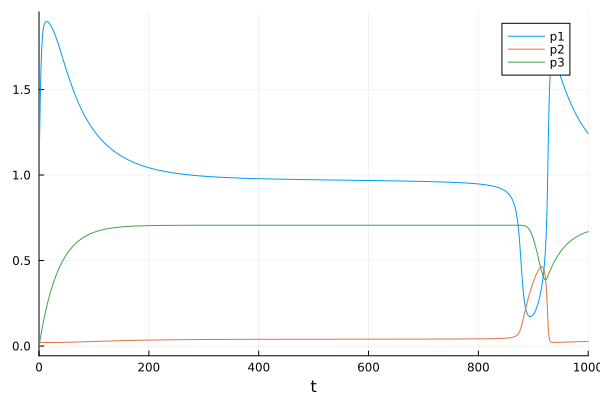

In [3]:
ptot = 2
α = 0.01
α0 = 0.0183
αp = 0.4
Kp = 1
n = 4

p0 = [1, 0, 0]
tspan = (0, 1000)

prob = ODEProblem(tsai_pos_reg!, p0, tspan, [α, ptot, α0, αp, Kp, n])
sol = solve(prob, abstol=1e-8, reltol=1e-8)

plot(sol, labels=reshape(["p1", "p2", "p3"], 1, :))

## Numerically find the period

### $y = \alpha$ and $\alpha_p = 0.1$

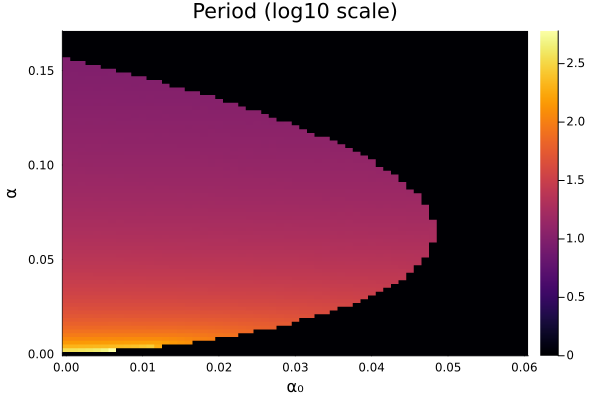

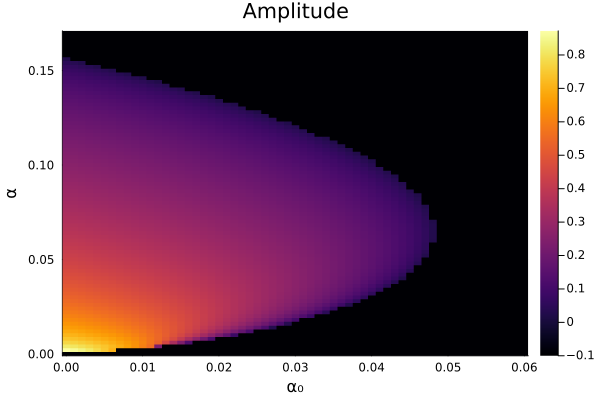

In [10]:
α_vec = 0:0.002:0.17
α0_vec = 0:0.001:0.06

ptot = 2
#α = 0.1
#α0 = 0.01
αp = 0.1
Kp = 1
n = 4

# find period numerically
per_mat = zeros(length(α0_vec), length(α_vec))
amp_mat = zeros(length(α0_vec), length(α_vec))
    
p0 = [1, 0, 0]

for (i, α0) in enumerate(α0_vec)
    for (j, α) in enumerate(α_vec)
        converge, amplitude, per, phase = 
        attracted_to(tsai_pos_reg!, p0, 50, [α, ptot, α0, αp, Kp, n], burnin=25, conv_tol=2e-3, amp_cutoff=2e-2)
        per_mat[i, j] = per
        amp_mat[i, j] = amplitude
    end
end

       
p = heatmap(α0_vec, α_vec, (x -> x == -1 ? 0 : log(x)/log(10)).(transpose(per_mat)))
title!(p, "Period (log10 scale)")
xlabel!(p, "α₀")
ylabel!(p, "α")
display(p)

heatmap(α0_vec, α_vec, (x -> x == -1 ? -0.1 : x).(transpose(amp_mat)), vmax=2.6)
title!("Amplitude")
xlabel!("α₀")
ylabel!("α")

### $y = \alpha$ and $\alpha_p = 0.5$

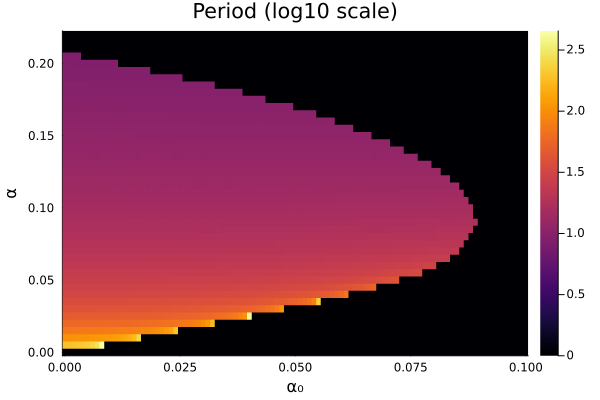

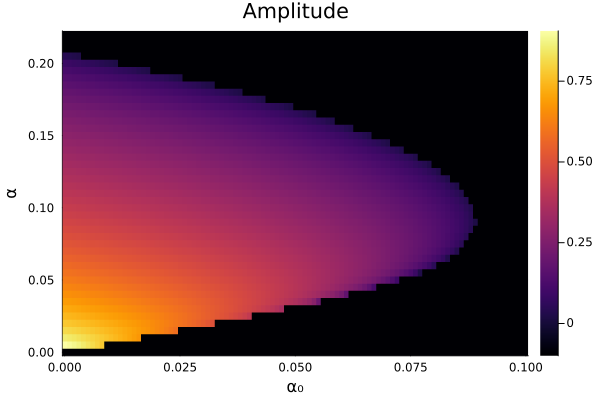

In [5]:
α_vec = 0:0.005:0.22
α0_vec = 0:0.001:0.1

ptot = 2
#α = 0.1
#α0 = 0.01
αp = 0.5
Kp = 1
n = 4

# find period numerically
per_mat = zeros(length(α0_vec), length(α_vec))
amp_mat = zeros(length(α0_vec), length(α_vec))
    
p0 = [1, 0, 0]

for (i, α0) in enumerate(α0_vec)
    for (j, α) in enumerate(α_vec)
        converge, amplitude, per, phase = 
        attracted_to(tsai_pos_reg!, p0, 50, [α, ptot, α0, αp, Kp, n], burnin=25, conv_tol=5e-3, amp_cutoff=2e-2)
        per_mat[i, j] = per
        amp_mat[i, j] = amplitude
    end
end

       
p = heatmap(α0_vec, α_vec, (x -> x == -1 ? 0 : log(x)/log(10)).(transpose(per_mat)))
title!(p, "Period (log10 scale)")
xlabel!(p, "α₀")
ylabel!(p, "α")
display(p)

heatmap(α0_vec, α_vec, (x -> x == -1 ? -0.1 : x).(transpose(amp_mat)))
title!("Amplitude")
xlabel!("α₀")
ylabel!("α")

### $y = \alpha_p$ and $\alpha = 0.1$

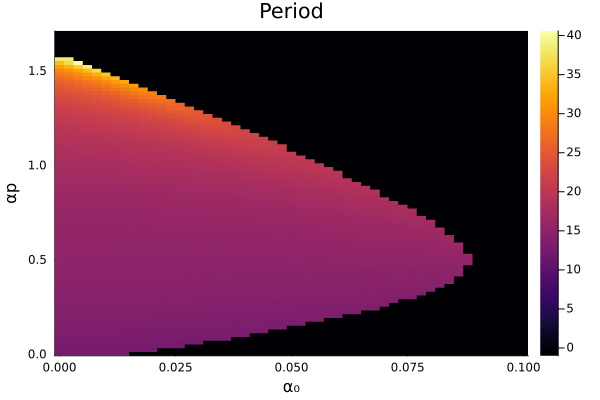

In [6]:
αp_vec = 0:0.02:1.7
α0_vec = 0:0.002:0.1

ptot = 2
α = 0.1
#α0 = 0.01
#αp = 0.1
Kp = 1
n = 4

# find period numerically
per_mat = zeros(length(α0_vec), length(αp_vec))
    
p0 = [1, 0, 0]

for (i, α0) in enumerate(α0_vec)
    for (j, αp) in enumerate(αp_vec)
        converge, amplitude, per, phase = 
        attracted_to(tsai_pos_reg!, p0, 50, [α, ptot, α0, αp, Kp, n], burnin=25, conv_tol=2e-3, amp_cutoff=2e-2)
        per_mat[i, j] = per
    end
end

       
heatmap(α0_vec, αp_vec, transpose(per_mat))
xlabel!("α₀")
ylabel!("αp")
title!("Period")

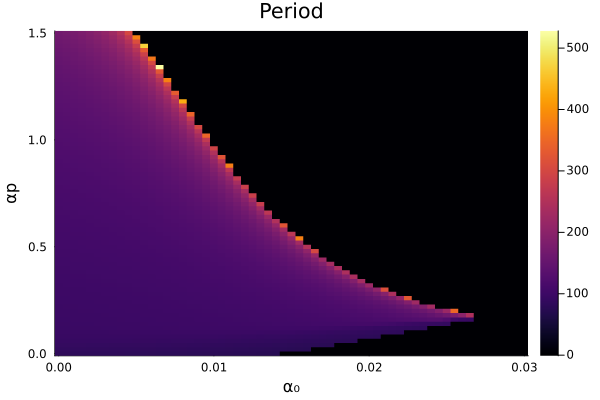

In [7]:
αp_vec = 0:0.02:1.5
α0_vec = 0:0.0005:0.03

ptot = 2
α = 0.01
#α0 = 0.01
#αp = 0.1
Kp = 1
n = 4

# find period numerically
per_mat = zeros(length(α0_vec), length(αp_vec))
    
p0 = [1, 0, 0]

for (i, α0) in enumerate(α0_vec)
    for (j, αp) in enumerate(αp_vec)
        converge, amplitude, per, phase = 
        attracted_to(tsai_pos_reg!, p0, 50, [α, ptot, α0, αp, Kp, n], burnin=25, conv_tol=2e-3, amp_cutoff=2e-2)
        per_mat[i, j] = per
    end
end

       
heatmap(α0_vec, αp_vec, transpose(per_mat))
xlabel!("α₀")
ylabel!("αp")
title!("Period")

In [8]:
# intersect at fixed alpha
fixed_A_vec = [0.02, 0.05, 0.1, 0.2, 0.4]

fil_id = []
j = 1
for (i, A) in enumerate(A_vec)
    if abs(fixed_A_vec[j] - A) < 1e-6
        fil_id = [fil_id..., i]
        j += 1
        if j > length(fixed_A_vec)
            break
        end
    end
end

fil_per_mat = per_mat[:, fil_id]
fil_per_mat = (x -> x == -1 ? NaN : x).(fil_per_mat)

# plot
plot(B_vec, fil_per_mat; layout=5, legend=false, 
    title=(x -> "A = $x").(transpose(fixed_A_vec)), size=(900, 450), linewidth=3, margin=2.5mm)
# ylims!(0, 12)
xlabel!("B")
ylabel!("Period")
for i in range(1, 5)
    ylims!(0, maximum((x -> isnan(x) ? -1 : x).(fil_per_mat[:, i]))*1.2, subplot=i)
end
plot!()

LoadError: UndefVarError: A_vec not defined